# CS 109A/AC 209A/STAT 121A Data Science: Homework 0
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**

Import libraries

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
from bs4 import BeautifulSoup
import urllib
%matplotlib inline

## Problem 1: Processing Tabular Data from File

In this problem, we practice reading csv formatted data and doing some very simple data exploration.

### Part (a): Reading CSV Data with Numpy

Open the file $\mathtt{dataset}$\_$\mathtt{HW0.txt}$, containing birth biometrics as well as maternal data for a number of U.S. births, and inspect the csv formatting of the data. Load the data, without the column headers, into an numpy array. 

Do some preliminary explorations of the data by printing out the dimensions as well as the first three rows of the array. Finally, for each column, print out the range of the values. 

<b>Prettify your output</b>, add in some text and formatting to make sure your outputs are readable (e.g. "36x4" is less readable than "array dimensions: 36x4").

In [43]:
data = np.genfromtxt("dataset_HW0.txt", dtype=float, delimiter=',', names=True) 
data[3]
#data[0].range

(6.08610660864, 4.49542705624, 17.0)

### Part (b): Simple Data Statistics

Compute the mean birth weight and mean femur length for the entire dataset. Now, we want to split the birth data into three groups based on the mother's age:

1. Group I: ages 0-17
2. Group II: ages 18-34
3. Group III: ages 35-50

For each maternal age group, compute the mean birth weight and mean femure length. 

<b>Prettify your output.</b>

Compare the group means with each other and with the overall mean, what can you conclude?

In [47]:
overallMeanWeight=np.mean(data['birth_weight'],axis=0)
overallMeanFemur=np.mean(data['femur_length'],axis=0)
group1data=data[data['mother_age']<=17]
group1MeanWeight=np.mean(group1data['birth_weight'],axis=0)
group1MeanFemur=np.mean(group1data['femur_length'],axis=0)
group2data=data[(data['mother_age']>17) & (data['mother_age']<35)]
group2MeanWeight=np.mean(group2data['birth_weight'],axis=0)
group2MeanFemur=np.mean(group2data['femur_length'],axis=0)
group3data=data[data['mother_age']>=35]
group3MeanWeight=np.mean(group3data['birth_weight'],axis=0)
group3MeanFemur=np.mean(group3data['femur_length'],axis=0)
print overallMeanWeight
print group1MeanWeight
print group2MeanWeight
print group3MeanWeight
print overallMeanFemur
print group1MeanFemur
print group2MeanFemur
print group3MeanFemur

6.10407017286
5.16889979912
6.70536363695
5.83665361844
3.82759083154
3.50680640853
4.0043330551
3.79489080744


### Part (c): Simple Data Visualization

Visualize the data using a 3-D scatter plot. How does your visual analysis compare with the stats you've computed in Part (b)?

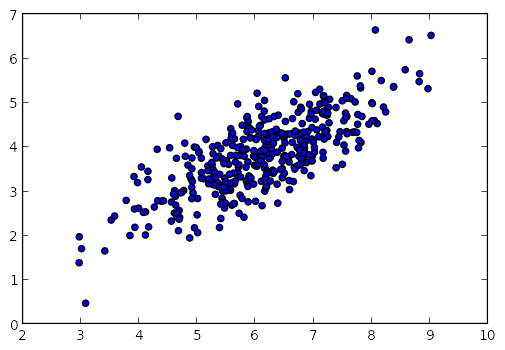

In [49]:
x = data['birth_weight']
y = data['femur_length']
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radiuses

plt.scatter(x, y)
plt.show()

### Part (d): Simple Data Visualization (Continued)

Visualize two data attributes at a time,

1. maternal age against birth weight
2. maternal age against femur length
3. birth weight against femur length

using 2-D scatter plots.

Compare your visual analysis with your analysis from Part (b) and (c).

### Part (e): More Data Visualization

Finally, we want to visualize the data by maternal age group. Plot the data again using a 3-D scatter plot, this time, color the points in the plot according to the age group of the mother (e.g. use red, blue, green to represent group I, II and III respectively).

Compare your visual analysis with your analysis from Part (a) - (c).

## Problem 2: Processing Web Data

In this problem we practice some basic web-scrapping using Beautiful Soup.

### Part (a): Opening and Reading Webpages

Open and load the page (Kafka's The Metamorphosis) at 

$\mathtt{http://www.gutenberg.org/files/5200/5200-h/5200-h.htm}$

into a BeautifulSoup object. 

The object we obtain is a parse tree (a data structure representing all tags and relationship between tags) of the html file. To concretely visualize this object, print out the first 1000 characters of a representation of the parse tree using the $\mathtt{prettify()}$ function.

### Part (b): Exploring the Parsed HTML

Explore the nested data structure you obtain in Part (a) by printing out the following:

1. the content of the head tag
2. the text of the head tag
3. each child of the head tag
2. the text of the title tag
3. the text of the preamble (pre) tag
4. the text of the first paragraph (p) tag

### Part (c): Extracting Text

Now we want to extract the text of The Metamorphosis and do some simple analysis. Beautiful Soup provides a way to extract all text from a webpage via the $\mathtt{get}$_$\mathtt{text()}$ function. 

Print the first and last 5000 characters of the text returned by $\mathtt{get}$_$\mathtt{text()}$. Is this the content of the novela? Where is the content of The Metamorphosis stored in the BeautifulSoup object?

### Part (d): Extracting Text (Continued)

Using the $\mathtt{find}$_$\mathtt{all()}$ function, extract the text of all $\mathtt{p}$ tags and concatenate the result into a single string. Print out the first 1000 characters of the string as a sanity check.

### Part (e): Sentence and Word Count

Count the number of words in The Metamorphosis. Compute the average word length and plot a histogram of word lengths.

Count the number of sentences in The Metamorphosis. Compute the average sentence length and plot a histogram of sentence lengths.

**Hint**: You'll need to pre-process the text in order to obtain the correct word/sentence length and count. 

## Problem 3: Data from Simulations

In this problem we practice generating data by setting up a simulation of a simple phenomenon, a queue. 

Suppose we're interested in simulating a queue that forms in front of a small Bank of America branch with one teller, where the customers arrive one at a time.

We want to study the queue length and customer waiting time.

### Part (a): Simulating Arrival and Service Time

Assume that gaps between consecutive arrivals are uniformly distributed over the interval of 1 to 20 minutes (i.e. any two times between 1 minute and 6 minutes are equally likely). 

Assume that the service times are uniform over the interval of 5 to 15 minutes. 

Generate the arrival and service times for 100 customers, using the $\mathtt{uniform()}$ function from the $\mathtt{random}$ library.

### Part (b): Simulating the Queue

Write function that computes the average queue length and the average customer wait time, given the arrival times and the service times.

### Part (c): Average Queue Length and Wait Time

Run your simulation 500 times and report the mean and std of the average wait time and queue length for 100 customers. What do these statistics mean?

Explain why is isn't sufficient to run our simulation **once** and report the average wait time/queue length we obtain.

## Problem 4 (Challenge Problem): More Web Scrapping

In this problem we practice extracting tabular web data. Open and read the webpage at

$\mathtt{http://www.thisismoney.co.uk/money/news/article-2928285/Economy-tables-GDP-rates-inflation-history-unemployment.html}$

Extract the Inflation History table and load it into a numpy array.

Generate a line graph representing the trend of consumer price index vs time (in months).